# Latent Dirichlet Allocation and Dynamic Topic Modelling

In this project we consider Latent Dirichlet Allocation (LDA) method for modelling topics in Wikipedia articles and Dynamic Topic Modelling for tweets with hashtag "SuezCanal.

In simple terms, LDA is a method of discovering topics that a given document contains. It represents the document as a mixiture of topics that generate words with certain probabilities. It is a Bayesian model in the sense that we make prior assumption on some parameters for this model.

## Simple example

We have downloaded around 470 random articles from Wikipedia and append two more articles of interest. Both of them have the same topic. We want to apply LDA to all but the last article and obtain topics, which we can check on the last article.

Wikipedia package details: https://pypi.org/project/wikipedia/

### Download the articles

In [148]:
import wikipedia #pip install wikipedia

# Generate random articles names
# Add two of our choice
# wikipedia_random_articles = wikipedia.random(2000) #generate random articles' names
# wikipedia_random_articles.append("Bayes' Theorem")
# wikipedia_random_articles.append('Bayesian inference')

In [149]:
# Download the articles
# from time import time
# t0 = time()


# wikipedia_articles = []
# success = 0
# for wikipedia_article in wikipedia_random_articles:
#     try:
#         wikipedia_articles.append([wikipedia_article, wikipedia.page(wikipedia_article).content])
#         success += 1
#     except:
#         continue
#     if success == 472:
#         break
# print(success)

# print("done in %0.3fs." % (time() - t0))


17
done in 39.370s.


In [209]:
# save the scraped articles to pickle

#import pickle
#pickle.dump(wikipedia_articles, open( f'wikipedia_articles2.p', "wb" ) )
#print(time.time())

In [407]:
# load the saved before articles
# are provided separately
# if not, please refer to the Github page: https://github.com/JeleznayaDeva/ST451-Project
import pickle
wikipedia_articles = pickle.load(open(f'wikipedia_articles2.p',"rb"))

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Prepare the Data

Clean up the text and tokenize it.

In [4]:
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
import string

def clean_wiki(article):
    title, document = article
    document = re.sub(r'\n', '', document)
    document = re.sub(r'\{\{.*?\}\}', '', document)
    document = re.sub(r'\[\[Category:.*', '', document)
    document = re.sub(r'==\s*[Ss]ource\s*==.*', '', document)
    document = re.sub(r'==\s*[Rr]eferences\s*==.*', '', document)
    document = re.sub(r'==\s*[Ee]xternal [Ll]inks\s*==.*', '', document)
    document = re.sub(r'==\s*[Ee]xternal [Ll]inks and [Rr]eferences==\s*', '', document)
    document = re.sub(r'==\s*[Ss]ee [Aa]lso\s*==.*', '', document)
    document = re.sub(r'http://[^\s]*', '', document)
    document = re.sub(r'\[\[Image:.*?\]\]', '', document)
    document = re.sub(r'Image:.*?\|', '', document)
    document = re.sub(r'\[\[.*?\|*([^\|]*?)\]\]', r'\1', document)
    document = re.sub(r'\&lt;.*?&gt;', '', document)
    document = re.sub(r'[0-9]', '', document)
    document = re.sub(r'[|\^&+\-%*/=!>]','',document) 
    return document

def tokenize_wiki(document):
    #title = titledocument[0]
    #document = titledocument[1]
    tokens = RegexpTokenizer(r'\w+').tokenize(document.lower())
    tokens_clean = [token for token in tokens if (token not in stopwords.words('english')) \
                   and (len(token)>1)]
    tokens_stemmed = [PorterStemmer().stem(token) for token in tokens_clean]

    
    return tokens_stemmed


In [5]:
wikipedia_articles_clean = list(map(clean_wiki, wikipedia_articles))


In [ ]:
# Create Dictionary
from gensim import corpora, models
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

article_contents = list(map(tokenize_wiki,wikipedia_articles_clean))
dictionary = corpora.Dictionary(article_contents)

# LDA model and predict
This model uses algorithm from Online Learning for LDA article: https://papers.nips.cc/paper/2010/file/71f6278d140af599e06ad9bf1ba03cb0-Paper.pdf

In [62]:
# Function for plotting the topics
import matplotlib.pyplot as plt

def plot_topics(topics, title = "Topics in LDA Model"):
    fig, axes = plt.subplots(3, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    #title = "Topics"

    for topic_idx, topic in topics:
        top_features_ind = [(float(ww.split("*")[0]),ww.split("*")[1].strip()) for ww in topic.split("+")]
        top_features = [x[1].replace('"','') for x in top_features_ind]
        weights = [x[0] for x in top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights)#, height=0.7)
        ax.set_title(f'Topic {topic_idx + 1}',
                            fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=18)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    #fig.tight_layout()
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

We first train the model without the last two articles.

In [98]:
# Prepare the corpus of documents to train the model
# transfer the contents of articles to corresponding vectors
corpus = [dictionary.doc2bow(article) for article in article_contents] 


In [159]:
# Train the model with all articles except 'Bayesian inference' and 'Bayes Theorem'
lda_model1 = gensim.models.ldamodel.LdaModel(corpus[:-2], num_topics=15, id2word = dictionary, 
                                            passes=100, random_state = 1)
print(lda_model1.print_topics(num_topics=15, num_words=5))

[(0, '0.006*"virenqu" + 0.005*"languag" + 0.005*"said" + 0.004*"poet" + 0.004*"use"'), (1, '0.009*"schultz" + 0.007*"de" + 0.007*"lake" + 0.006*"state" + 0.005*"michigan"'), (2, '0.007*"jordan" + 0.005*"univers" + 0.005*"cross" + 0.004*"criss" + 0.004*"year"'), (3, '0.006*"also" + 0.005*"rout" + 0.004*"state" + 0.004*"ford" + 0.004*"year"'), (4, '0.007*"colleg" + 0.006*"de" + 0.005*"univers" + 0.005*"also" + 0.004*"nasa"'), (5, '0.010*"film" + 0.006*"american" + 0.005*"new" + 0.005*"gate" + 0.004*"state"'), (6, '0.016*"news" + 0.008*"hack" + 0.008*"world" + 0.008*"inform" + 0.007*"phone"'), (7, '0.016*"river" + 0.010*"district" + 0.009*"km" + 0.008*"area" + 0.008*"locat"'), (8, '0.017*"antigen" + 0.012*"cell" + 0.008*"german" + 0.007*"germani" + 0.007*"finland"'), (9, '0.010*"surfac" + 0.009*"play" + 0.007*"team" + 0.007*"leagu" + 0.006*"factor"'), (10, '0.020*"video" + 0.016*"perform" + 0.015*"song" + 0.013*"award" + 0.013*"music"'), (11, '0.006*"film" + 0.006*"belli" + 0.005*"fort" +

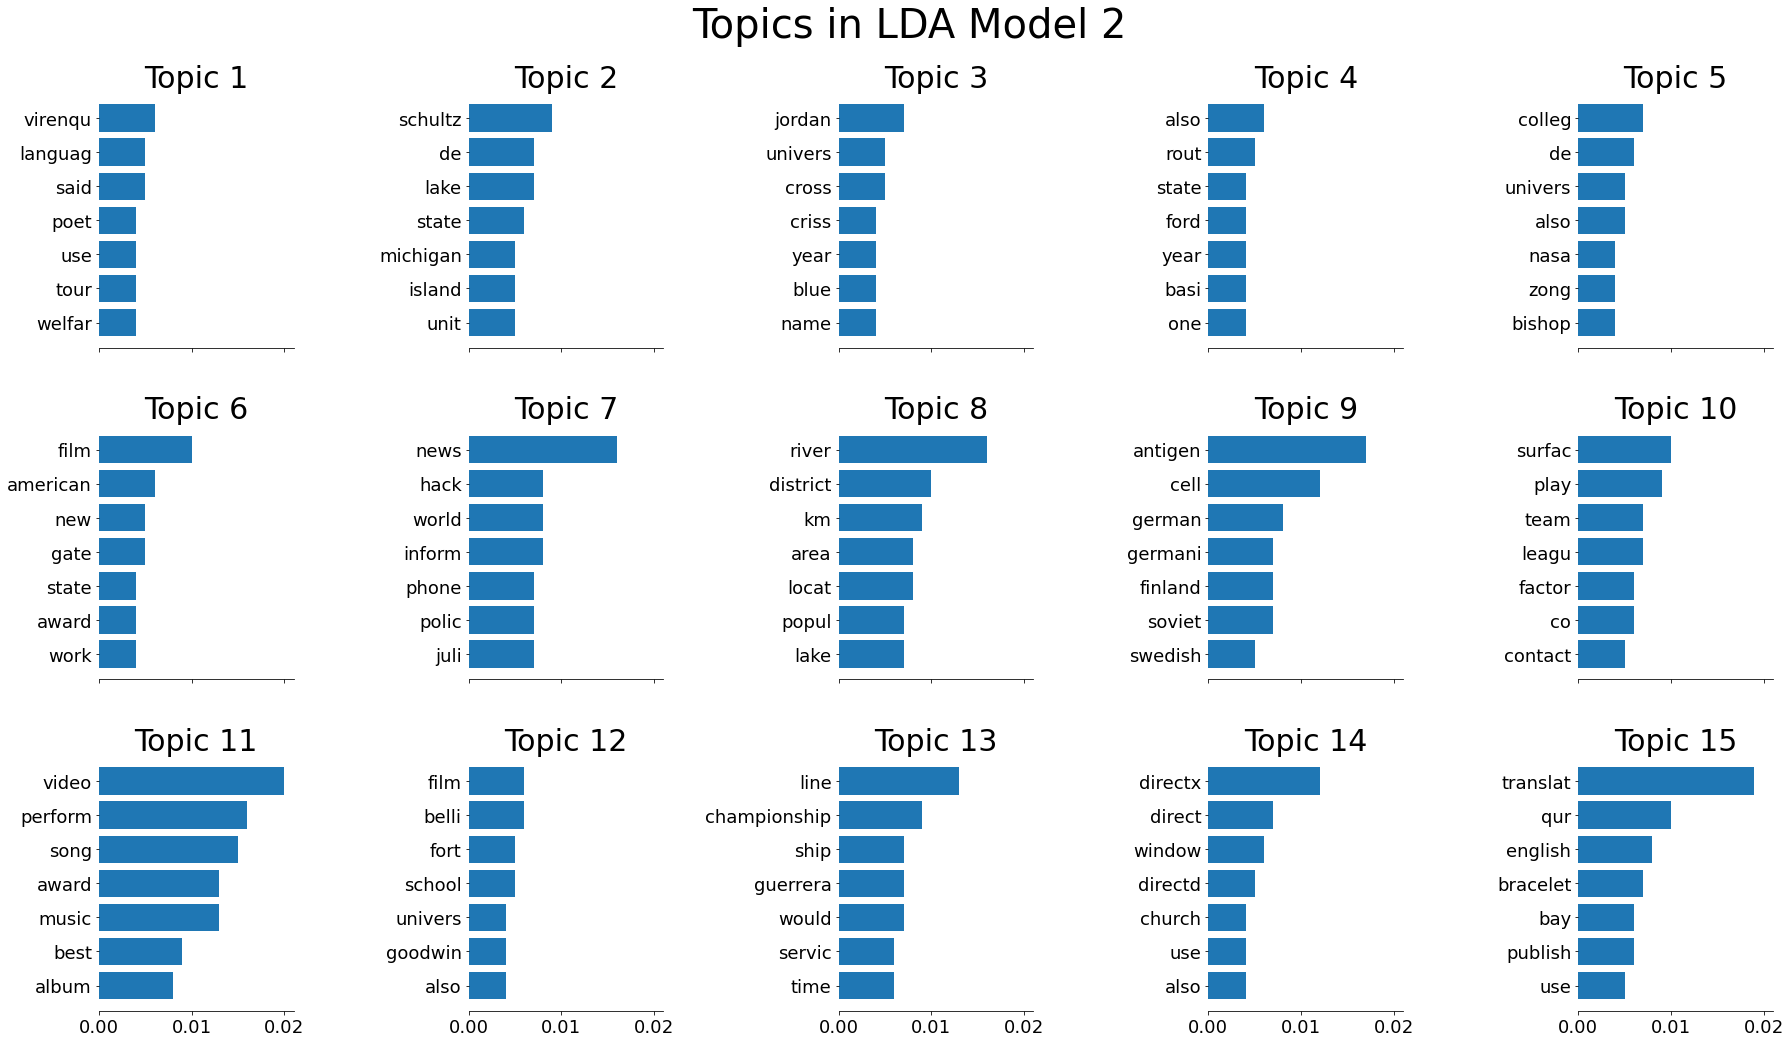

In [160]:
plot_topics(lda_model1.print_topics(num_topics=15, num_words=7),"Topics in LDA Model 2")

In [161]:
# Topic Allocation
probs = list(lda_model1[[dictionary.doc2bow(article_contents[-1])]])
print([(int(x[i][0])+1, x[i][1]) for x in probs for i in range(len(probs[0]))])
#print(list(lda_model1[[dictionary.doc2bow(article_contents[-1])]]))

[(1, 0.048770722), (2, 0.12470789), (4, 0.055348676), (5, 0.03492626), (6, 0.041454908), (7, 0.23229375), (10, 0.3423291), (14, 0.06413341), (15, 0.04433267)]


In [162]:
lda_model1.log_perplexity([dictionary.doc2bow(article_contents[-1])],1)

-48.47672774094147

In [163]:
print('ELBO = ', lda_model1.bound([corpus[-1]]))
print('ELBO = ', lda_model1.bound(corpus))

ELBO =  -141164.2313246727
ELBO =  -1291271.68474257


### Method 1
We add the article "Bayes' Theorem" by update method. We compare the perplexities and prediction for the last article.

In [154]:
lda_model1.update([dictionary.doc2bow(article_contents[-2])])

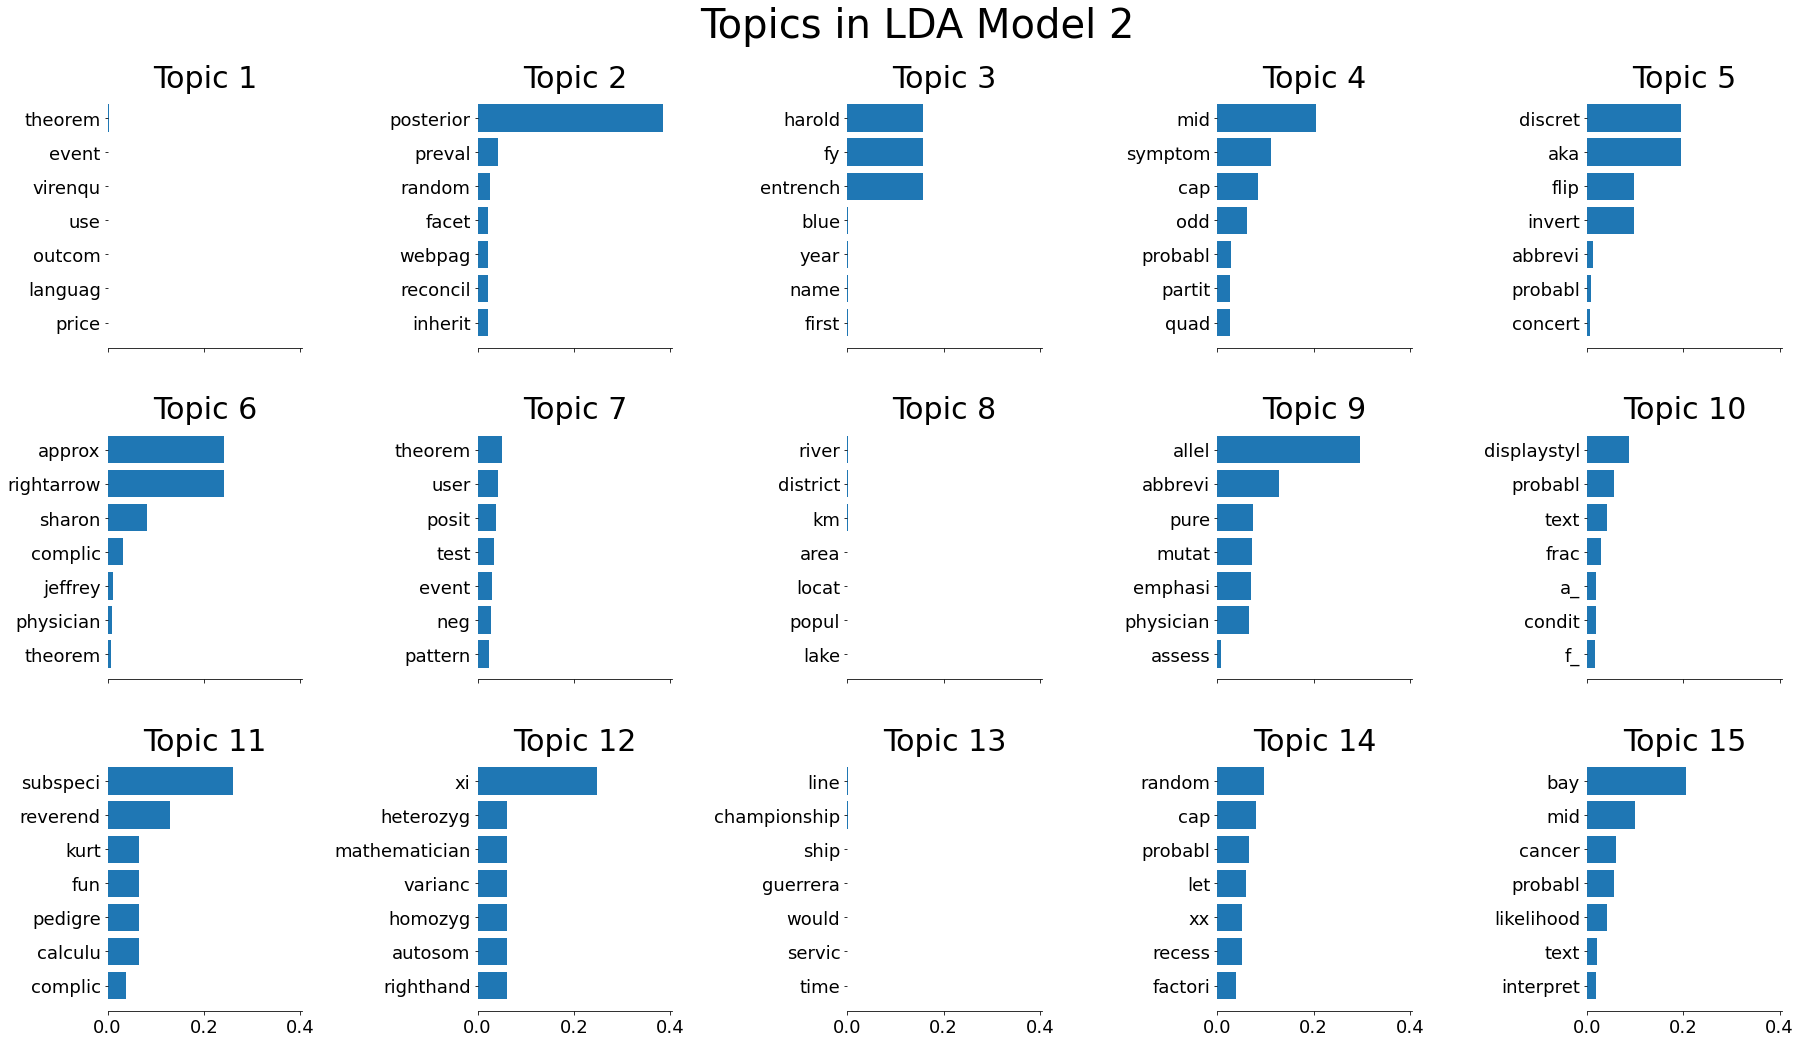

In [155]:
plot_topics(lda_model1.print_topics(num_topics=15, num_words=7), "Topics in LDA Model 2")

In [156]:
# Topic Allocation
probs = list(lda_model1[[dictionary.doc2bow(article_contents[-1])]])
print([(int(x[i][0])+1, x[i][1]) for x in probs for i in range(len(probs[0]))])
#print(list(lda_model[[dictionary.doc2bow(article_contents[-1])]]))

[(2, 0.044874948), (4, 0.050301965), (6, 0.01213842), (7, 0.24778911), (10, 0.54420143), (15, 0.086310595)]


In [157]:
lda_model1.log_perplexity([dictionary.doc2bow(article_contents[-1])],1)

-32.087004582878656

In [158]:
# ELBO = E_q(log p(x,z)) - E_q(log q(z))
# E_q[log p(corpus)] - E_q[log q(corpus)] from gensim
# q is the distr of latent variables z
# p is the distr of the observations x

print('ELBO = ', lda_model1.bound([corpus[-1]]))
print('ELBO = ', lda_model1.bound(corpus))

ELBO =  -93437.35107970238
ELBO =  -2317820.6362482123


## Method 2
We train the model with all but the last article and compare the perplexity on it with the two previous ones.

In [131]:
# Train on all articles except "Bayesian Inference"
lda_model3 = gensim.models.ldamodel.LdaModel(corpus[:-1], num_topics=15, id2word = dictionary, 
                                            passes=100, random_state = 1)
print(lda_model3.print_topics(num_topics=15, num_words=5))

[(0, '0.007*"languag" + 0.005*"poet" + 0.005*"welfar" + 0.005*"util" + 0.005*"social"'), (1, '0.009*"de" + 0.007*"schultz" + 0.007*"state" + 0.006*"lake" + 0.005*"unit"'), (2, '0.006*"cross" + 0.005*"criss" + 0.005*"jeff" + 0.004*"blue" + 0.003*"courvoisi"'), (3, '0.005*"also" + 0.005*"state" + 0.004*"rout" + 0.004*"nation" + 0.004*"year"'), (4, '0.013*"displaystyl" + 0.011*"probabl" + 0.007*"colleg" + 0.007*"bay" + 0.007*"mid"'), (5, '0.013*"film" + 0.005*"new" + 0.005*"american" + 0.005*"gate" + 0.004*"releas"'), (6, '0.011*"inform" + 0.008*"experi" + 0.007*"knowledg" + 0.007*"neg" + 0.006*"trait"'), (7, '0.016*"river" + 0.010*"area" + 0.010*"km" + 0.008*"south" + 0.008*"locat"'), (8, '0.014*"antigen" + 0.010*"cell" + 0.006*"german" + 0.006*"finland" + 0.006*"soviet"'), (9, '0.010*"play" + 0.009*"surfac" + 0.008*"leagu" + 0.007*"team" + 0.006*"season"'), (10, '0.019*"video" + 0.013*"perform" + 0.013*"song" + 0.013*"award" + 0.010*"music"'), (11, '0.007*"belli" + 0.007*"fort" + 0.005*

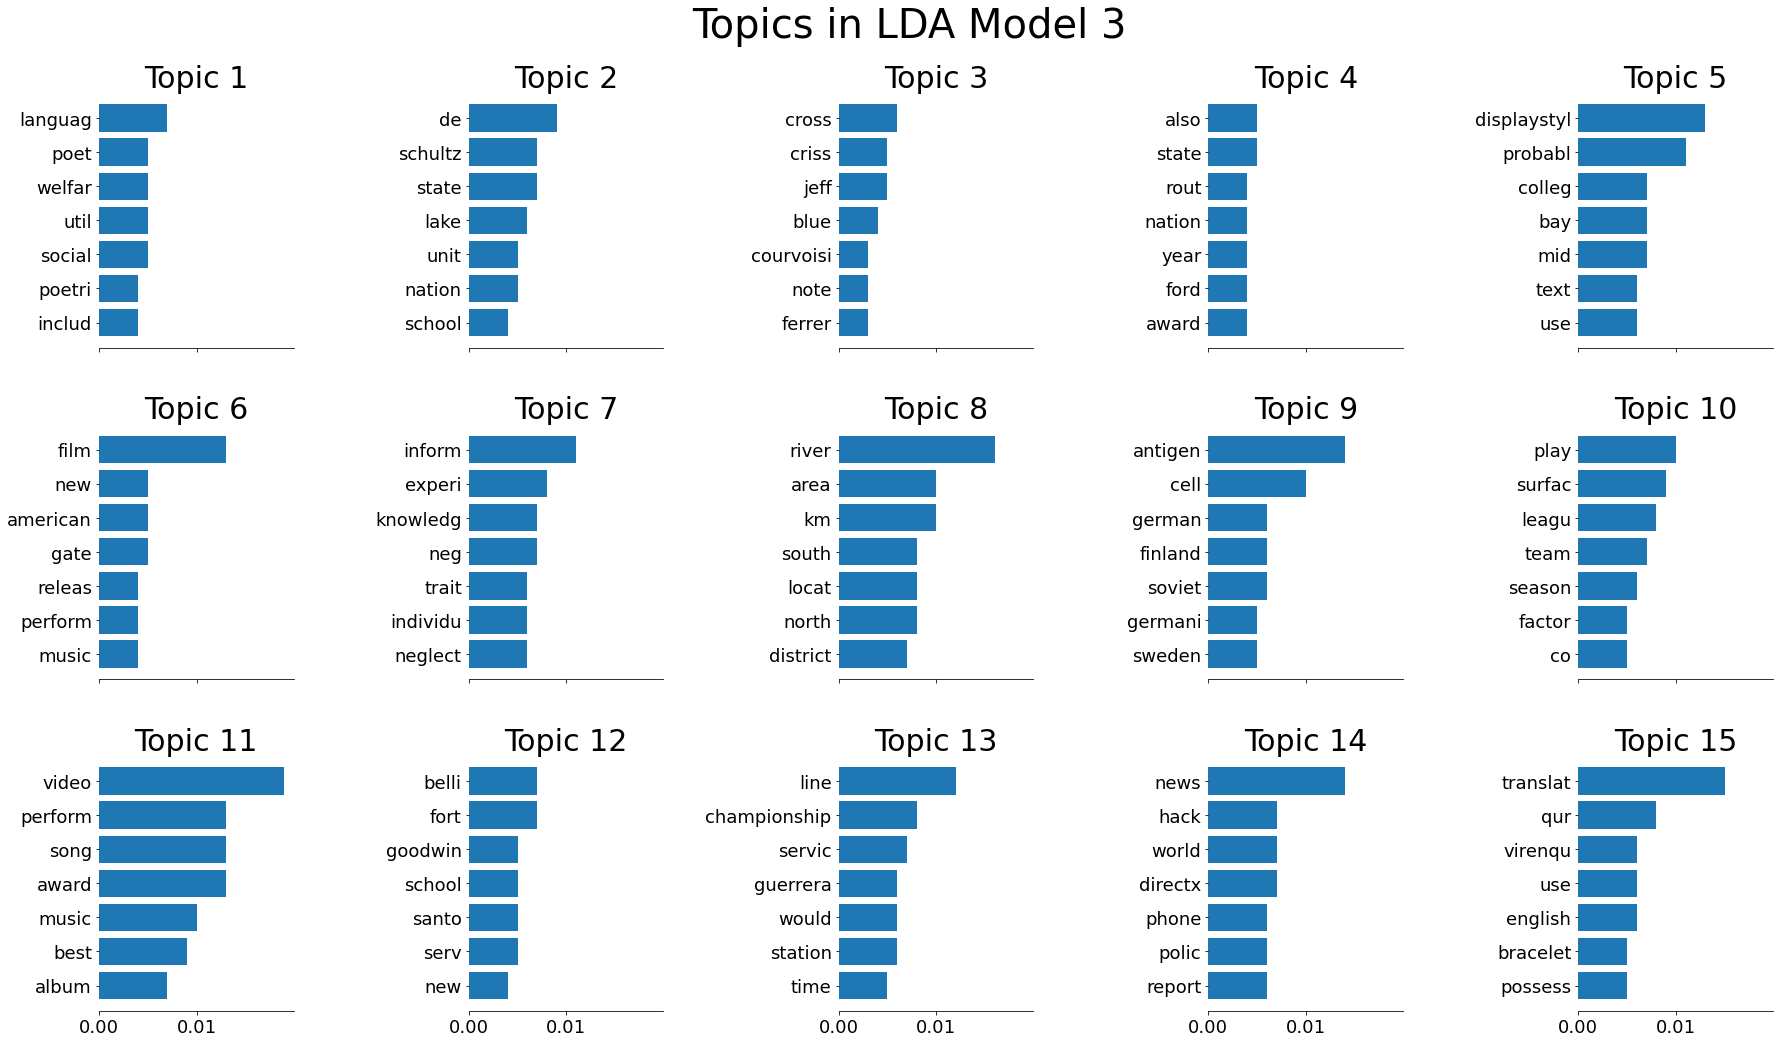

In [136]:
plot_topics(lda_model3.print_topics(num_topics=15, num_words=7), "Topics in LDA Model 3")

In [133]:
probs = list(lda_model3[[dictionary.doc2bow(article_contents[-1])]])
print([(int(x[i][0])+1, x[i][1]) for x in probs for i in range(len(probs[0]))])

#print(list(lda_model[[dictionary.doc2bow(article_contents[-1])]]))

[(1, 0.013480181), (2, 0.03333044), (4, 0.014267136), (5, 0.5622894), (6, 0.036394265), (7, 0.10945471), (10, 0.15011835), (14, 0.055545017), (15, 0.01504191)]


In [135]:
lda_model3.log_perplexity([dictionary.doc2bow(article_contents[-1])],1)

-47.02984315549934

In [153]:
print('ELBO = ', lda_model3.bound([corpus[-1]]))
print('ELBO = ', lda_model3.bound(corpus))

ELBO =  -136950.9066004753
ELBO =  -1279956.2531101704


In [ ]:
perpl_list = []
for i in range(len(article_contents)):
    perpl_list.append(lda_model3.log_perplexity([dictionary.doc2bow(article_contents[i])],1))

# Dynamic Topic Modelling
based on variational Kalman Filter: https://mimno.infosci.cornell.edu/info6150/readings/dynamic_topic_models.pdf

GitHub: https://github.com/RaRe-Technologies/gensim/blob/develop/gensim/models/ldaseqmodel.py

Gensim: https://radimrehurek.com/gensim/models/ldaseqmodel.html

In [164]:
# setting up our imports

from gensim.models import ldaseqmodel
from gensim.corpora import Dictionary


In [165]:
import pickle
import pandas as pd
import numpy as np


In [231]:
# Load the Twitter Data
tweetslists = list(pd.read_csv("tweets.csv").Content)

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [167]:
# Functions for cleaning and stemming
import re
import string
import nltk

def clean_tokenize(document):
    '''     Input:
                actual text to be tokenized
            Returns:
                list of tokens generated
    '''
    tokens = []
    
    #text = text.encode('ascii', 'ignore').decode('utf-8') #for urls
    document=re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_.@&+]|[!*(),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', document) # to replace url with ''
    # Remove mentions
    document = re.sub(r'@[A-Za-z0-9_]+', '', document)
    # Remove hashtags
    document = re.sub(r'#[A-Za-z0-9_]+', '', document)
    # Remove retweets:
    document = re.sub(r'RT : ', '', document)
    # Remove special characters
    #text = special_character_regex.sub(" ",text)  
    # Remove numbers
    document = re.sub(r'[0-9]', '', document)
    document=document.lower()
    document = re.sub(r'\n', '', document)
    document = re.sub(r'\{\{.*?\}\}', '', document)
    document = re.sub('[,\.!?]', '', document)
    document = re.sub(r'\[\[.*?\|*([^\|]*?)\]\]', '', document)
    document = re.sub(r'\&lt;.*?&gt;', '', document)
    document = re.sub(r'[|\^&+\-%*/=!>]','',document) 

    for word in document.split(): #not in stop_words \and
        if word not in string.punctuation \
            and len(word)>1 \
            and word != '``':
                tokens.append(word)
    return tokens

def stem(tweet_tokens_clean):
    tokens_clean = [token for token in tweet_tokens_clean if (token not in stopwords.words('english')) \
                   and (len(token)>1)]
    tokens_stemmed = [PorterStemmer().stem(token) for token in tokens_clean]

    
    return tokens_stemmed

In [398]:
# Clean the tweets
clean_tweets_tokens = list(map(clean_tokenize,tweetslists))
clean_tweets_tokens = list(map(stem,clean_tweets_tokens))

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [172]:
from time import time
from gensim import corpora, models
import gensim
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
common_dictionary = Dictionary(common_texts)

dictionary = corpora.Dictionary(clean_tweets_tokens)
t0 = time()
corpus_tw = [dictionary.doc2bow(tweet) for tweet in clean_tweets_tokens if len(tweet)>1]
corpus_len = len(corpus_tw)
sequence = [113]*int(corpus_len/113) # how many tweets are considered in each time slice 

ldaseq_tw_large = ldaseqmodel.LdaSeqModel(corpus=corpus_tw, id2word=dictionary, 
                                        time_slice=sequence, num_topics=8, 
                                        chunksize=1, chain_variance=0.05) #faster topic change
# Load pretrained model if available
# ldaseqmodel.LdaSeqModel.load("ldaseq_tw_large_8")
print(f'time taken:{time()-t0} s')

time taken:0.8294289112091064 s


In [ ]:
# save the trained model
# ldaseq_tw_large.save("ldaseq_tw_large")

### Plots 

In [310]:
topics_probs_list = []
for i in range(8):
    d = [dict(x) for x in ldaseq_tw_large.print_topic_times(topic=i, top_terms = 15)]
    topics_probs_list.append([i, d])
# 0[15] stuck
# 1[16] help, 1[18] ever, 1[20] refloat, 1[23] crisi
# 2[19] ever, 2[29] blockag (BUT 1 time)
# 3[21] block, 3[12] traffic
# 4[18] block (increasing prob), 4[20] contain, 4[21] jam, 4[23] unstuck
# 5[21] blockag, 5[14] (increasing) given
# 

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [383]:
block_words = ['stuck', 'traffic', 'block', 'blockag',  'ever', 'given', 'help',  'crisi']
usual_words = ['suez', 'canal', 'egypt','contain']


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [299]:
def topic_to_np(word, topics_list):
    '''
    returns an array of probabilities of shape (8,36)
    for a word to be in a topic in a particular time interval
    '''
    ar = [[y.get(word,0) for y in x[1]] for x in topics_list]
    return np.array(ar)

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [394]:
def plot_words(words_list, form = (2,4), size = (32, 16), title = "Words Distributions over time"):
    fig, axes = plt.subplots(form[0], form[1], figsize=size, sharex=True)
    axes = axes.flatten()
    #title = "Topics"

    for idx,word in enumerate(words_list):
        ax = axes[idx]
        dist = np.max(topic_to_np(word, topics_probs_list), axis = 0)
        ax.plot(dist,'o-', linewidth=3)#, height=0.7)
        ax.set_title(f'{word}', fontdict={'fontsize': 25})
        #ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=18)
        #for i in 'top right left'.split():
         #   ax.spines[i].set_visible(False)
        #fig.suptitle(title, fontsize=35)
    #fig.tight_layout()
    #plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
#plt.plot(np.sum(topic_to_np(word, topics_probs_list), axis = 0))

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


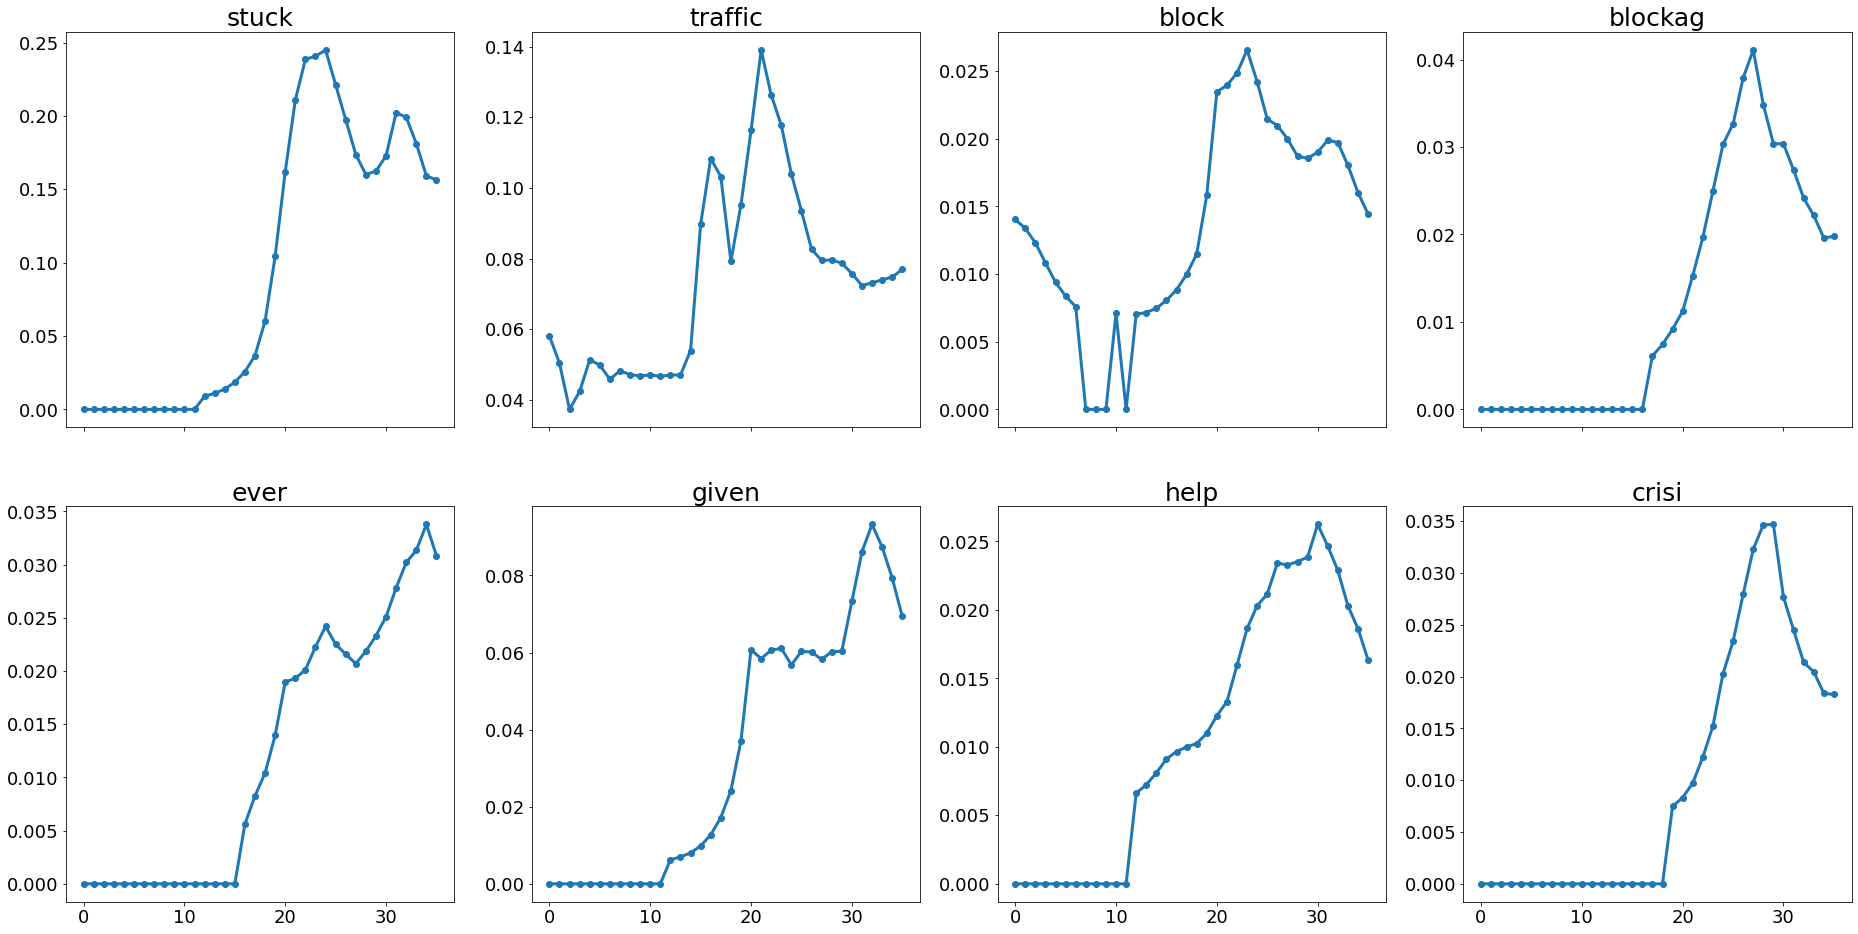

In [395]:
plot_words(block_words)

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


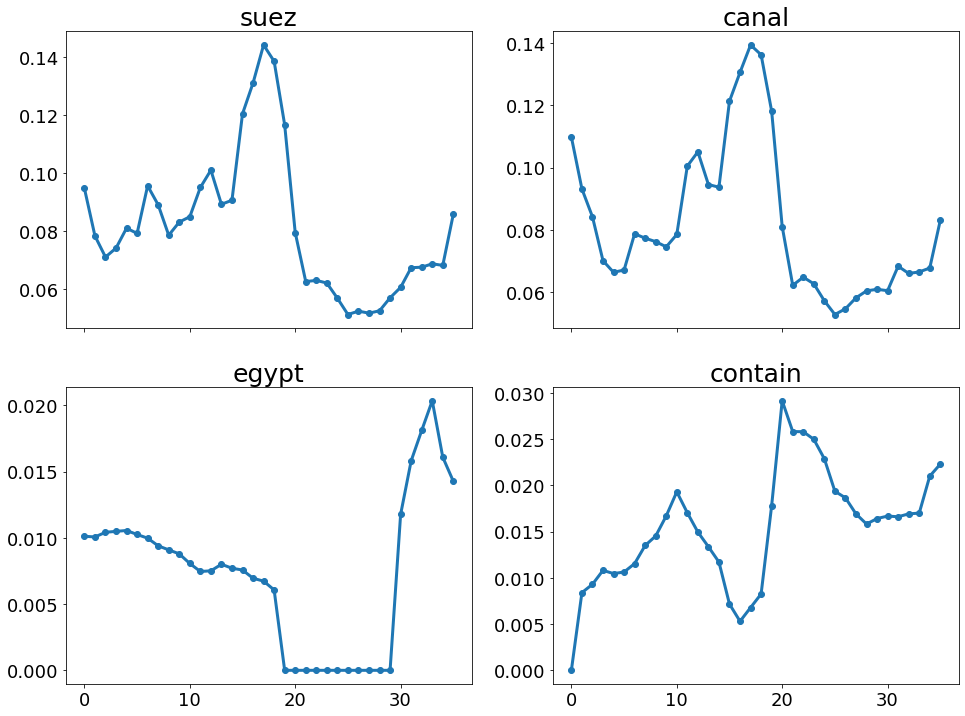

In [396]:
plot_words(usual_words, (2,2), (16,12))

# Comparison LDA to k-means

### k-means

In [422]:
import spacy


nlp = spacy.load("en_core_web_md")
# Process whole documents

def cleanup_text(text):
    my_doc = nlp(text)
    token_list = []
    for token in my_doc:
        token_list.append(token.text)

    filtered_sentence =[]

    for word in token_list:
        lexeme = nlp.vocab[word]
        if (not lexeme.is_stop) and (lexeme.rank>500) and (len(lexeme.text)>2) and (lexeme.is_alpha) and (not lexeme.is_oov):
            filtered_sentence.append(word)

    return ' '.join(filtered_sentence)

def text_to_vec_spacy(text):
    v = nlp(text)
    return v.vector

def most_similar_spacy(v, n=5, larger_n=50):
    res = nlp.vocab.vectors.most_similar(np.array([v]), n=larger_n)[0].flatten()
    words = list(set([nlp.vocab[_].text.lower() for _ in res if (not nlp.vocab[_].is_stop)]))
    words_2 = [nlp.vocab[_].text for _ in words if (nlp.vocab[_].rank > 100)  and (nlp.vocab[_].rank<500000) and (not nlp.vocab[_].is_stop) and (not nlp.vocab[_].is_oov)]
    return words_2[:n]



#tweetslists = en_tweets_info('Suez_Canal_2018-2020.p')
texts = [_ for _ in wikipedia_articles_clean[-16:-1]]
texts = [cleanup_text(_) for _ in texts]
texts = sum([_.split(' ') for _ in texts], [])

#clean_texts = [cleanup_text(text) for text in texts]
v = np.array([text_to_vec_spacy(text) for text in texts])
#v = v[:5000]
import sklearn.cluster
km = sklearn.cluster.KMeans(n_clusters=15)
km.fit(v)

#v=np.mean(v, axis=0)
w = [most_similar_spacy(_) for _ in km.cluster_centers_]



/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['negative', 'negitive', 'increases', 'ever-increasing', 'ascertain'], ['pedrosa', 'villalobos', 'piaf', 'rothwell', 'menninger'], ['hand', 'one-person', 'little', 'way', 'ones'], ['spelling', 'grammar', 'englis', 'translated', 'comprehensibility'], ['paperback', 'essays', 'reading', 'sayings', 'disquisitions'], ['python', 'cowie', 'compiling', 'arlo', 'multivolume'], ['american', 'germany', 'sicily', 'usa', 'embarcadero'], ['far', 'city', 'came', 'town', 'brought'], ['right-leaning', 'republican', 'conservative', 'vice-presidential', 'political'], ['perception', 'understanding', 'elucidated', 'precedes', 'percieved'], ['isherwood', 'greenspan', 'miore', 'sweeney', 'bourdain'], ['computed', 'quadratic', 'strang', 'regressions', 'cyclic'], ['long-term', 'given', 'speciﬁc', 'important', 'provide'], ['protist', 'transgenic', 'determinant', 'biologic', 'diagnostically'], ['computed', 'quadratic', 'hypothesizes', 'regressions', 'ascertain']]


In [473]:
print(w)
len(w)

[['negative', 'negitive', 'increases', 'ever-increasing', 'ascertain'], ['pedrosa', 'villalobos', 'piaf', 'rothwell', 'menninger'], ['hand', 'one-person', 'little', 'way', 'ones'], ['spelling', 'grammar', 'englis', 'translated', 'comprehensibility'], ['paperback', 'essays', 'reading', 'sayings', 'disquisitions'], ['python', 'cowie', 'compiling', 'arlo', 'multivolume'], ['american', 'germany', 'sicily', 'usa', 'embarcadero'], ['far', 'city', 'came', 'town', 'brought'], ['right-leaning', 'republican', 'conservative', 'vice-presidential', 'political'], ['perception', 'understanding', 'elucidated', 'precedes', 'percieved'], ['isherwood', 'greenspan', 'miore', 'sweeney', 'bourdain'], ['computed', 'quadratic', 'strang', 'regressions', 'cyclic'], ['long-term', 'given', 'speciﬁc', 'important', 'provide'], ['protist', 'transgenic', 'determinant', 'biologic', 'diagnostically'], ['computed', 'quadratic', 'hypothesizes', 'regressions', 'ascertain']]


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15

In [416]:
for i in range(15):
     print(wikipedia_articles[-16:-1][i][0])

Emirhisar, Çivril
Frederick George Penney
Lance Clemons
Boossa
Argulidae
Clientelism
NDUFA7
Language poets
Nicolae Grigorescu
Parco della Favorita
Erratic Valley
Behabad
El Alamito
2011 Channel One Cup
Bayes' Theorem


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [479]:
texts_test = [wikipedia_articles_clean[-1]]
texts_test = [cleanup_text(_) for _ in texts_test]
texts_test = sum([_.split(' ') for _ in texts_test], [])

#clean_texts = [cleanup_text(text) for text in texts]
v_test = np.array([text_to_vec_spacy(text) for text in texts_test])
tr = km.transform(v_test)
pred = km.predict(v_test)
print("Closest cluster:", np.argmin(np.mean(tr, axis = 0))+1)
print("Most frequent cluster: ", np.argmax([np.where(pred==i)[0].shape[0] for i in range(15)])+1)

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Closest cluster: 13
Most frequent cluster:  13


In [460]:
texts_test2 = [wikipedia_articles_clean[-2]]
texts_test2 = [cleanup_text(_) for _ in texts_test2]
texts_test2 = sum([_.split(' ') for _ in texts_test2], [])
v_test2 = np.array([text_to_vec_spacy(text) for text in texts_test2])
tr2 = km.transform(v_test2)


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [478]:
pred2 = km.predict(v_test2)
print("Closest cluster:", np.argmin(np.mean(tr2, axis = 0))+1)
print("Most frequent cluster: ", np.argmax([np.where(pred2==i)[0].shape[0] for i in range(15)])+1)

Closest cluster: 1
Most frequent cluster:  1


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### LDA

/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


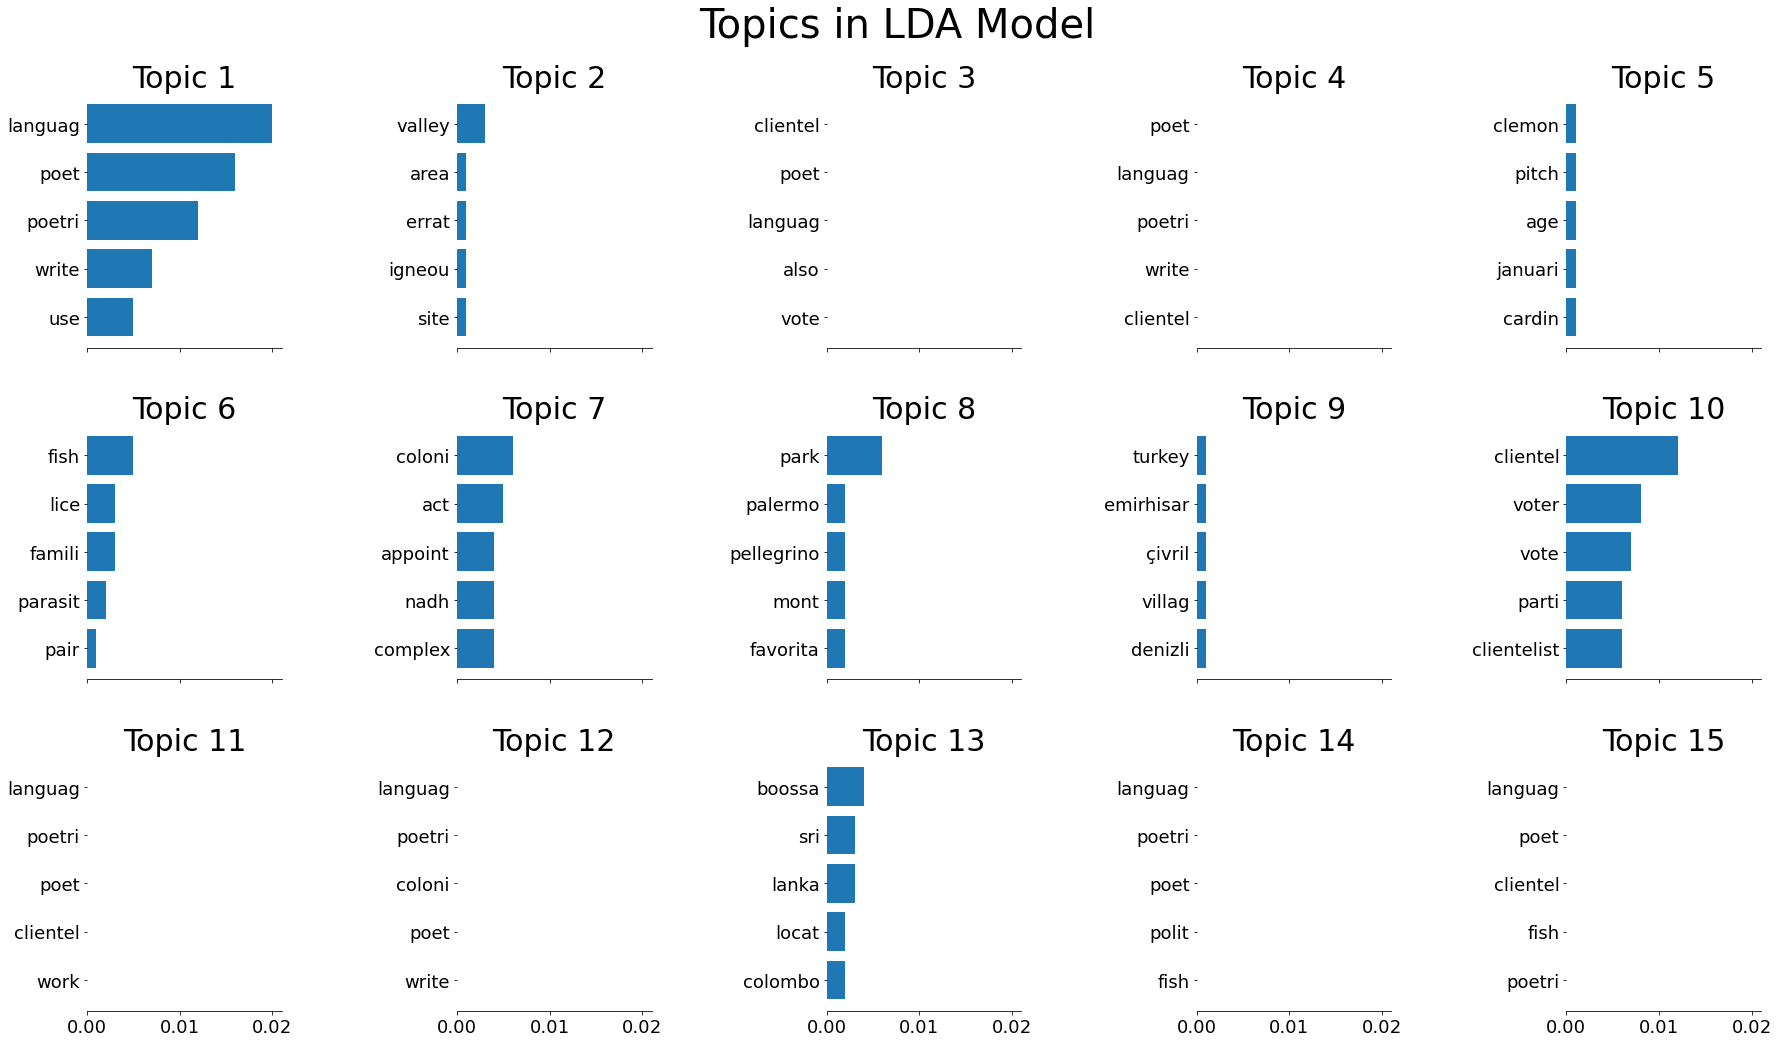

In [483]:
article_contents = list(map(tokenize_wiki,wikipedia_articles_clean))
dictionary = corpora.Dictionary(article_contents)
corpus = [dictionary.doc2bow(article) for article in article_contents] 

lda_model4 = gensim.models.ldamodel.LdaModel(corpus[-16:-2], num_topics=15, id2word = dictionary, 
                                            passes=100, random_state = 1)
plot_topics(lda_model4.print_topics(num_topics=15, num_words=5))

In [486]:
probs4 = list(lda_model4[[dictionary.doc2bow(article_contents[-1])]])
print([(int(x[i][0])+1, x[i][1]) for x in probs4 for i in range(len(probs4[0]))])

[(1, 0.2697492), (2, 0.03353884), (7, 0.08630692), (8, 0.015899982), (10, 0.5834054)]


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


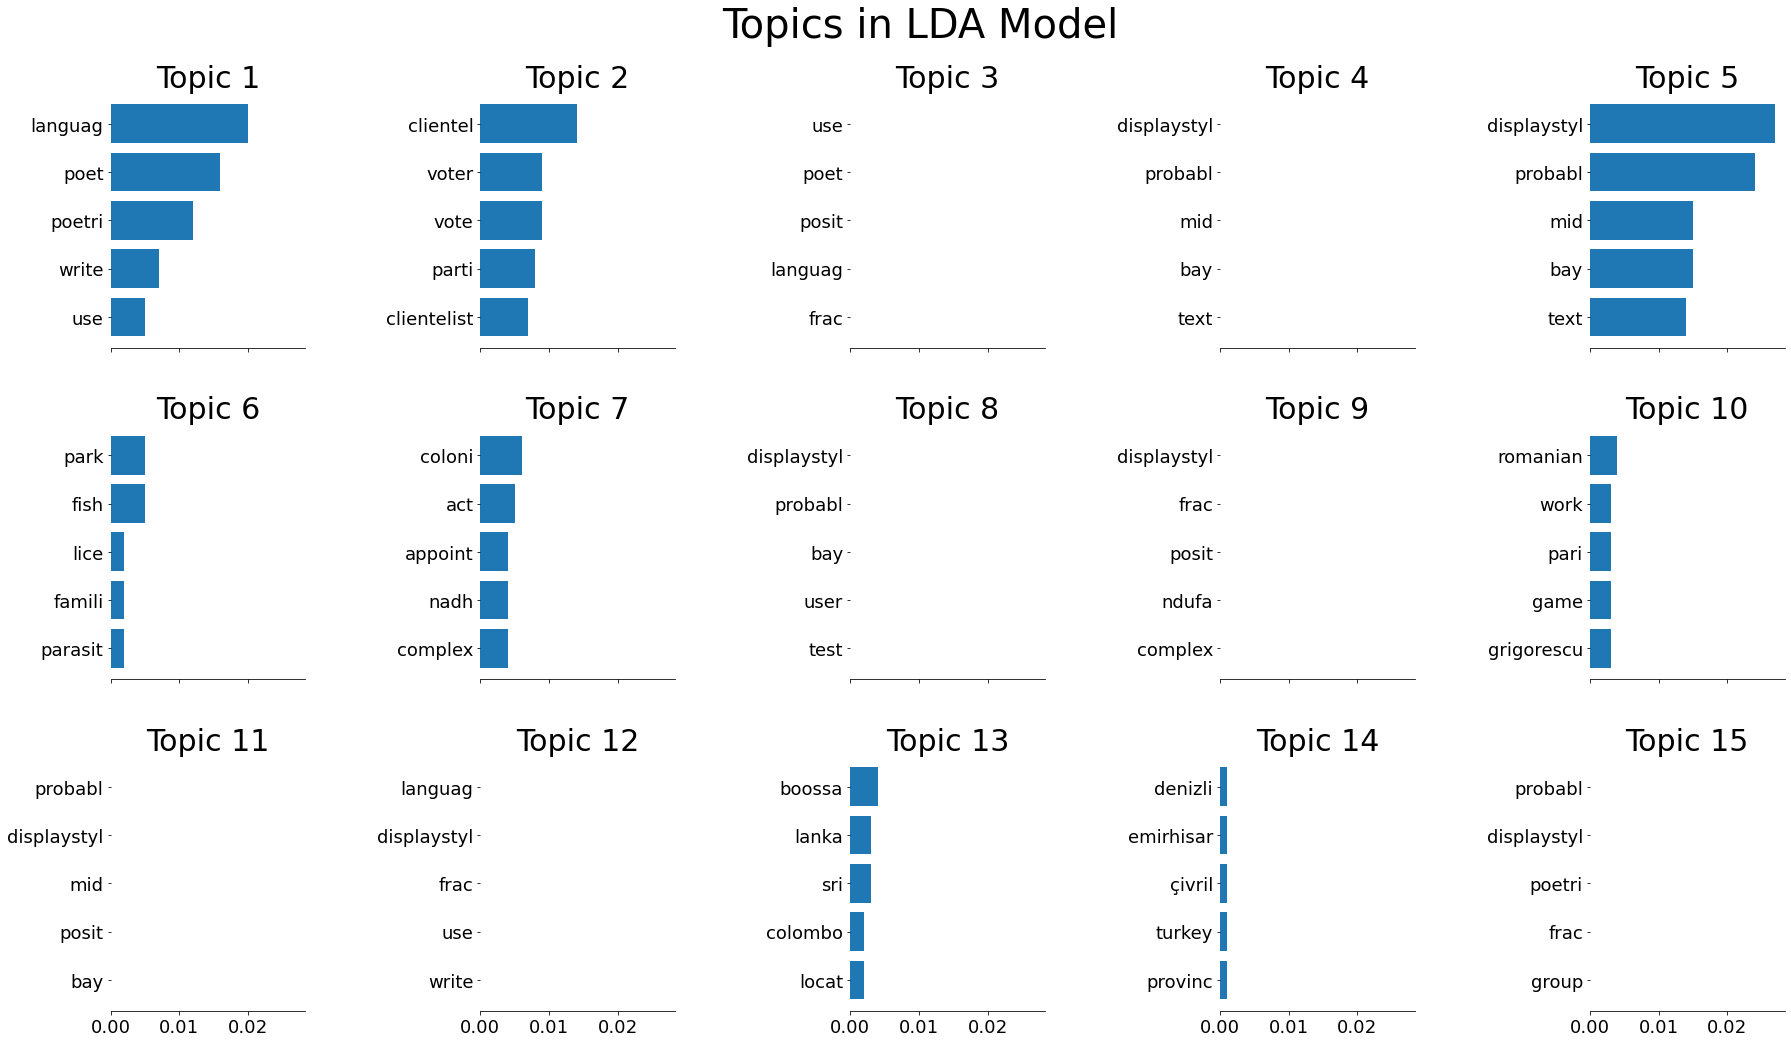

In [484]:
lda_model5 = gensim.models.ldamodel.LdaModel(corpus[-16:-1], num_topics=15, id2word = dictionary, 
                                            passes=100, random_state = 1)
plot_topics(lda_model5.print_topics(num_topics=15, num_words=5))

In [487]:
# Topic Allocation
probs5 = list(lda_model5[[dictionary.doc2bow(article_contents[-1])]])
print([(int(x[i][0])+1, x[i][1]) for x in probs5 for i in range(len(probs5[0]))])
#print(list(lda_model4[[dictionary.doc2bow(article_contents[-1])]]))

[(1, 0.059274845), (2, 0.12119648), (5, 0.78331065), (7, 0.02472404)]


/Users/firuzamamedova/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
